In [1]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina'       # Melhora a resolucao do plot
from IPython.core.display import display, HTML
import matplotlib.pylab as plt                     # Permite fazer plots utilizando o pacote matplotlib
plt.rcParams['figure.figsize'] = (9.0, 9.0)      # Determina o tamanho do plot dentro do ipython notebook
from astropy.io import fits
import numpy as np 
import pandas as pd
import math

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 20)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True 

plt.rcParams['xtick.major.width']  = 1
plt.rcParams['ytick.major.width']  = 1

**Motivação**: Esse código foi criado apenas após meses de trabalho no projeto pois percebi a necessidade de preservar em apenas uma pasta todas as modificações realizadas no catálogo. Até então, eu havia adicionado, corrigido e manipulado os parâmetros em pastas diferentes. Isso gera uma confusão na hora de saber qual é o catálogo mais atual e uma mudança frequente de nomes para cada nova versão. Portanto compilei todas as modificações em um único notebook, gerando ao final de cada rodada apenas um arquivo de texto com nome único.

**Modificações realizadas anteriormente:** Listo brevemente as modificações realizadas até então. 

* Adição dos quatro catálogos disponíveis: Blakeslee, Demarco, Patel e Tanaka.
* Realizado uma união de todos os catálogos baseados nas distâncias angulares.
* Adicionando para os objetos membros a magnitude U do VMOS

# 1 - Adicionando catálogos

## 1.1 - Adicionando catálogo Blakeslee

* Artigo original: Blakeslee et al., 2006

Descrição:

| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |          :--- |
| ID_B              | Identificação     | --    |
| RA_B              | Ascensão reta     | graus (J2000)    |
| DEC_B             | Declinação        | graus (J2000)     |
| F775W_B           | magnitude i SEX   | mag    |
| F775W_GALFIT_T    | magnitude i GALFIT| mag    |
| Re_T              | Raio efetivo      | arcsec    |
| nSer_T            | índice de Sérsic  | --    |
| Morph_T           | Tipo T (1)            | --    |
| ba_T              | razão de eixos    | --    |
| B_T               | Bumpiness         | --    |
| Sigma_T           | Densidade superficial de massa (2)| --    |
| r_i_T             | r - i     | mag    |
| e_r_i_T           | erro r - i     | mag    |
| i_z_T             | i - z     | mag    |
| e_i_z_T           | erro i - z     | mag    |
| r_z_T             | r - z     | mag    |
| e_r_z_T           | erro r - z     | mag    |

(1) Postman+2005

In [3]:
#Adicionando catalogos
cat_blakeslee = np.loadtxt('../00-Catalogos/catalog_blakeslee.txt')
cat_blakeslee = pd.DataFrame(cat_blakeslee)

#Adicionando o nome de cada coluna
cat_blakeslee.columns = ['ID_B','RA_B','DEC_B','F775W_B','F775W_GALFIT_B','Re_B','nSer_B','Morph_B','ba_B','B_B','sigma_B','r_i_B','e_r_i_B','i_z_B','e_i_z_B','r_z_B','e_r_z_B']
#cat_blakeslee

## 1.2 -  Adicionando catalogo Tanaka 

* Artigo original: Tanaka et al., 2006 (https://arxiv.org/pdf/astro-ph/0511296.pdf)

Descrição:


| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |      
| nm_col_T     | Numero coluna Tanaka            | --    |
| ID_T         | Identificação                   |  --   |
| RA_T         | Ascensão Reta                   | graus (J2000) |
| DEC_T        | Declinação                      | graus (J2000) |
| zmag_T       | z                               | mag    |
| Rci_T        | R - i                           | mag    |
| i_z_T        | i - z                           | mag    |
| zph_T        | Redshift fotometrico            | --     |
| zsp_T        | Redshift Espectroscópico        | --     |
| Zspmin_T     | Redshift Espectroscópico mínimo | --     |
| zpsmax_T     | Redshift Espectroscópico máximo | --     |
| zconf_T      | Confiabilidade do redshift      | --     |


In [12]:
#Adicionando catálogo Tanaka:

cat_tanaka = np.loadtxt('../00-Catalogos/catalog_tanaka.txt', dtype = 'string')
cat_tanaka = pd.DataFrame(cat_tanaka)

#Transformando as coordenadas de horas -> graus
a = ((((pd.to_numeric(cat_tanaka[4])/60) + pd.to_numeric(cat_tanaka[3]))/60) + pd.to_numeric(cat_tanaka[2]))*15
b = ((((pd.to_numeric(cat_tanaka[7])/60) + pd.to_numeric(cat_tanaka[6]))/60) + abs(pd.to_numeric(cat_tanaka[5])))*(-1)
cat_tanaka.insert(2,'2',a)
del cat_tanaka[2]
del cat_tanaka[3]
del cat_tanaka[4]

cat_tanaka.insert(3,'3',b)
del cat_tanaka[5]
del cat_tanaka[6]
del cat_tanaka[7]
#print cat_tanaka
cat_tanaka.columns = ['nm_col_T','ID_T','RA_T','DEC_T','zmag_T','VRc_T','Rci_T','i_z_T','zph_T','zsp_T','Zspmin_T','zpsmax_T','zconf_T']

#cat_tanaka

## 1.3 - Adicionando catálogo Demarco

* Artigo original: Demarco et al., 2010



| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |
|ID_D|  Identificão     | --    |
|RA_D|  Ascensão Reta     |  graus   |
|DEC_D|  Declinação     |  graus   |
|Z_D|  Redshift     | --    |
|EL_D| Flag de linhas de emissão      |  --   |
|TYPE_D|  Tipo T     |  --   |
|AUTO_R_D|  Magnitude R abertura mag_auto     |  mag   |
|ERR_AUTO_R_D|   Erro R MAG_AUTO   |  mag   |
|AP_R_D|   Magnitude R abertura 2arc    | mag    |
|ERR_AP_R_D|   Erro R 2arc     | mag    |
|AUTO_I_D|  Magnitude I abertura mag_auto     |  mag   |
|ERR_AUTO_I_D|   Erro I MAG_AUTO     | mag    |
|AP_I_D|   Magnitude I abertura 2arc    |  mag   |
|ERR_AP_I_D|   Erro I 2arc    |  mag   |
|AUTO_Z_D|  Magnitude Z abertura mag_auto     | mag    |
|ERR_AUTO_Z_D|   Erro Z MAG_AUTO     |  mag   |
|AP_Z_D|  Magnitude Z abertura 2arc     |  mag   |
|ERR_AP_Z_D|   Erro Z 2arc    | mag    |
|AUTO_J_D|  Magnitude J abertura mag_auto     | mag    |
|ERR_AUTO_J_D|   Erro J MAG_AUTO     | mag    |
|AP_J_D|  Magnitude J abertura 2arc     | mag    |
|ERR_AP_J_D|   Erro J 2arc    | mag    |
|AUTO_KS_D|  Magnitude Ks abertura mag_auto     |  mag   |
|ERR_AUTO_KS_D| Erro Ks MAG_AUTO       | mag    |
|AP_KS_D|  Magnitude Ks abertura 2arc     | mag    |
|ERR_AP_KS_D|   Erro Ks 2arc    |mag     |
|STEL_MASS_D|  Massa estelar     |     |
       

In [5]:
cat_demarco = np.loadtxt('../00-Catalogos/catalog_demarco.txt', dtype = 'string')
cat_demarco = pd.DataFrame(cat_demarco)

cat_demarco.columns =['ID_D','RA_D','DEC_D','Z_D','EL_D', 'TYPE_D' ,'AUTO_R_D' ,'ERR_AUTO_R_D', 'AP_R_D'   ,'ERR_AP_R_D' ,'AUTO_I_D' ,'ERR_AUTO_I_D' ,'AP_I_D',   'ERR_AP_I_D', 'AUTO_Z_D', 'ERR_AUTO_Z_D', 'AP_Z_D',   'ERR_AP_Z_D', 'AUTO_J_D', 'ERR_AUTO_J_D', 'AP_J_D',   'ERR_AP_J_D', 'AUTO_KS_D', 'ERR_AUTO_KS_D', 'AP_KS_D',  'ERR_AP_KS_D', 'STEL_MASS_D']


## 1.4 - Adicionando Patel

*  Artigo: Patel+2009 (http://iopscience.iop.org/article/10.1088/0004-637X/694/2/1349/pdf)

Descrição:

| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |     
| ID |  Identificação |  --   |      
| RA  |  Ascensão Reta  |  graus   |             
| DEC  | Declinação   | graus    |                 
| zmag_auto| Magnitude z mag_auto  |  mag   |           
| zmag_col  | Magnitude z ap 2arc   |  mag   |         
| Ks_col| Magnitude Ks ap 2arc   |  mag   |             
| z50    |    |  --   |               
| z025|    |  --   |      
|z975_P|    |  --   |      
|zspec_P|    | --    |      
|lmass_P|    |     |      
|density_P|   |     |      

In [6]:
cat_patel = np.loadtxt('../Catalogos/catalog_patel.txt', dtype = 'string')
cat_patel = pd.DataFrame(cat_patel)
cat_patel.columns = ['ID_P','RA_P','DEC_P','zmag_auto_P','zmag_col_P','Ks_col_P','z50_P','z025_z_P','z975_P','zspec_P','lmass_P','density_P']


## 1.5 Panorama de objetos presentes :

Como importado acima, temos 4 catálogos contendo galáxias confirmadas ou candidatas a membro do aglomerado. Os catálogos de Blakeslee e Demarco caracterizam principalmente a região central do aglomerado e possuem objetos confirmados a partir da análise do redshift espectroscópico. 

O catálogo de Tanaka possuem objetos que não estão dentro do range utilizado por Demarco para caracterizar os objetos neste aglomerado (0.81 < z < 0.87). Portanto necessitamos realizar uma seleção de objetos dentro deste intervalo.

Para o catálogo de Patel, temos uma grande quantidade de galáxias com uma grande variedade de redshifts espectroscópicos devido ao fato de que tal levantamento local foi realizado por espectrocopia LDP. 

Em suma, precisamos ter essas informações em mente para realizar uma seleção de objetos pertencentes ao aglomerado. 

À seguir, demonstro a posição dos objetos 

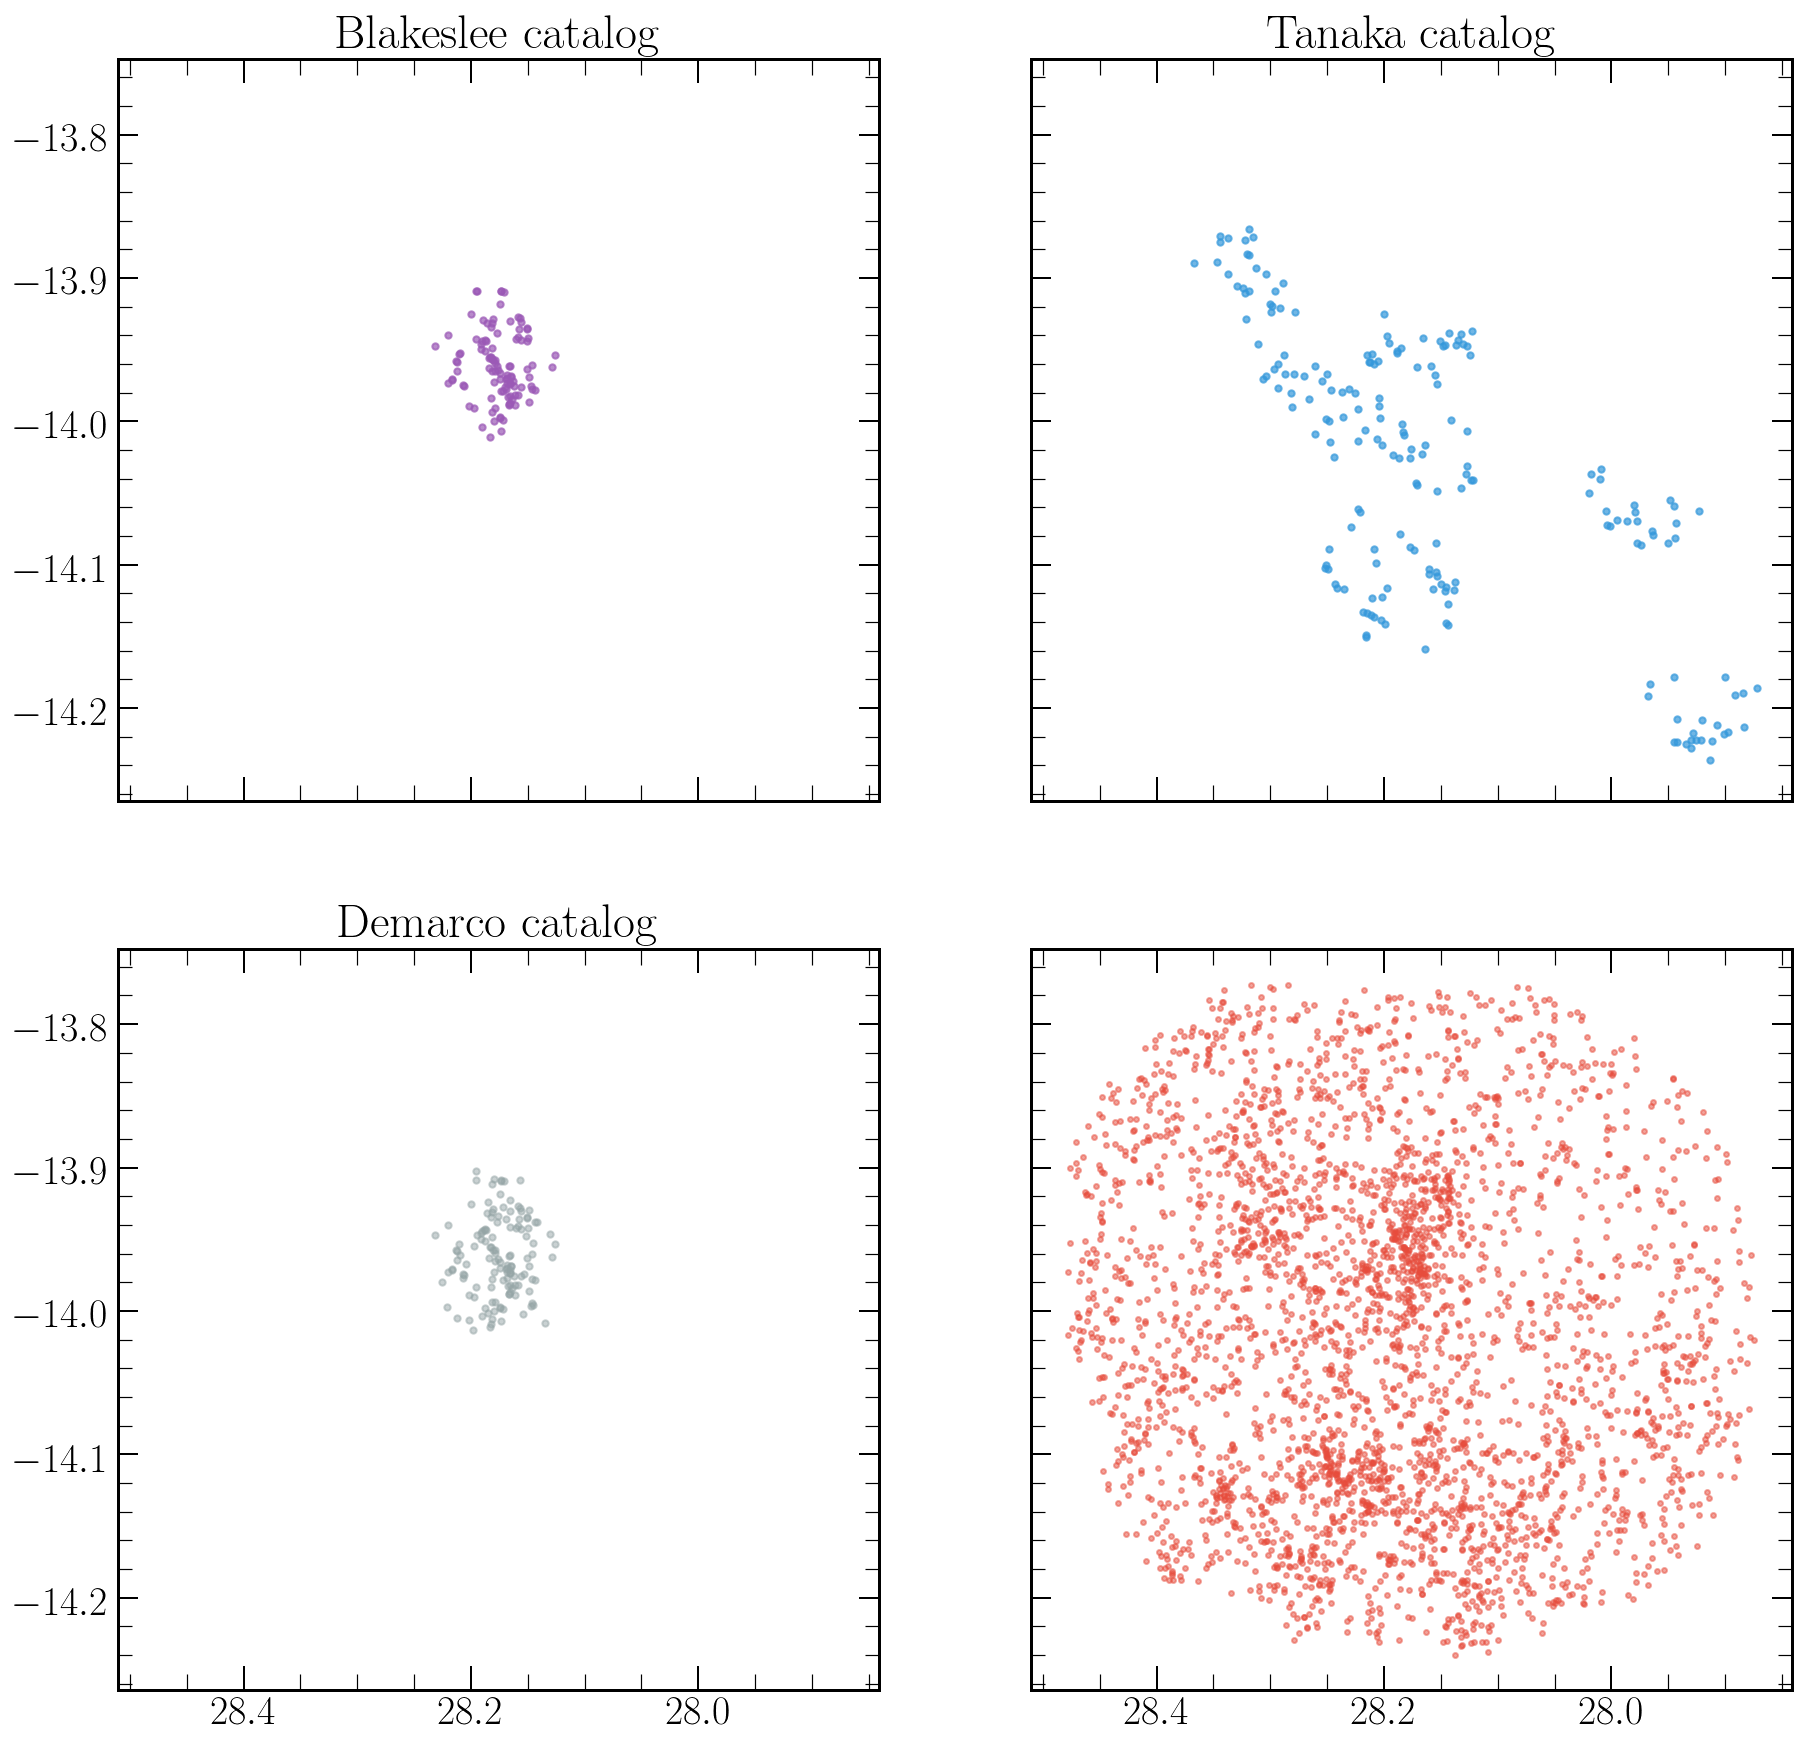

In [7]:
f, axarr = plt.subplots(2, 2, figsize = (15,15), sharex = True, sharey = True)
# Paleta de cores
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

axarr[0,0].scatter(cat_blakeslee['RA_B'],cat_blakeslee['DEC_B'],s = 10, label = 'Blakeslee', alpha=0.7, c = flatui[0] )
axarr[0,0].set_title('Blakeslee catalog')

axarr[0,1].scatter(cat_tanaka['RA_T'],cat_tanaka['DEC_T'],s = 10, label = 'Tanaka', c = flatui[1],alpha=0.7)
axarr[0,1].set_title('Tanaka catalog')

axarr[1,0].scatter(cat_demarco['RA_D'],cat_demarco['DEC_D'],s = 10, label = 'Demarco', alpha =0.5, c = flatui[2])
axarr[1,0].set_title('Demarco catalog')

axarr[1,1].scatter(cat_patel['RA_P'],cat_patel['DEC_P'], label = 'Patel',s = 6, c = flatui[3],alpha =0.5) 

plt.gca().invert_xaxis()

plt.savefig('targets_catalogs.pdf')

# 2 - Juntando objetos dos diferentes catálogos:

Método de junção: calcularei as distâncias angulares entre os objetos e ter como critério de seleção a distância máxima de 2''.

Inicialmente, criemos uma função que calcula a distância angular entre os objetos. A entrada precisa ser as ascensões retas e declinações dos objetos em graus. O próprio programa irá transformar os ângulos em radiano e realizar o cálculo. A saida é em radianos!!

In [61]:
#Calculo da distancia angular entre dois objetos
def calculo_distancia(alpha1,delta1,alpha2,delta2):
    alpha1 = math.radians(float(alpha1))
    alpha2 = math.radians(float(alpha2))
    delta1 = math.radians(float(delta1))
    delta2 = math.radians(float(delta2))
    return math.acos(math.sin(delta1)*math.sin(delta2) + math.cos(delta1)*math.cos(delta2)*math.cos(alpha1 - alpha2))#math.sqrt((float(alpha1) - float(alpha2))**2. +(float(delta1) - float(delta2))**2.)**(1/2.)


## 2.1 - Unindo Demarco com Blakeslee (DB):

Utilizarei como catálogo base o catálogo de Blakeslee, portanto adicionaremos a ele o catálogo de Demarco, inicial. Relembrando que, para ambos os catálogos, possuimos apenas objetos confirmados.

O que esperamos:
* Total Demarco: 134
*    Total Blakeslee: 107
*    Intersecao: 41

In [9]:
# Criando um vetor que acomodara as ascensoes retas e declinacoes dos objetos membro
RA_DB = list(cat_blakeslee['RA_B'])
DEC_DB = list(cat_blakeslee['DEC_B'])

##Loop para identificacao de objetos compativeis:
 # Logica: no comando anterior, adicionei a ascensao reta e declinacao dos objetos de 
 # blakeslee. Parao Loop calculo a distancia angular de todos os objetos de ambos os catalogos.
 # Caso o criterio de distancia angular seja menor do que dois segundos de arco nao seja 
 # satisfeito, ou seja, caso na haja comptibilidadentre os catalogos, o objeto eh adicionado 
 # ao vetor de coordenadas.
r = 0
for j in range(0,len(cat_demarco)):
    o = 0
    # Loop para calculo da separacao angular de um objeto de demarco para todo de Blakeslee
    for i in range(0,len(cat_blakeslee)):
        dist = calculo_distancia(cat_blakeslee[cat_blakeslee.columns[1]][i],cat_blakeslee[cat_blakeslee.columns[2]][i],cat_demarco[cat_demarco.columns[1]][j],cat_demarco[cat_demarco.columns[2]][j])
        if dist < 2*4.8481*10**(-6):
            o = o +1
    if o == 0:
        RA_DB.append(cat_demarco[cat_demarco.columns[1]][j])
        DEC_DB.append(cat_demarco[cat_demarco.columns[2]][j])

        
print 'Total Blakeslee: ',len(cat_blakeslee)
print 'Total Demarco: ', len(cat_demarco)
print 'Intersecao: ' ,len(RA_DB) - len(cat_blakeslee)

Total Blakeslee:  107
Total Demarco:  134
Intersecao:  41


## 2.2 - Unindo DB com Tanaka (DBT):

Adicionarei ao vetor anterior os objetos presentes apenas no catálogo de Tanaka, sob mesmo critério de dois segundos de arco. Neste caso, necessitamos realizar um corte de redshift como descrito acima:

O que esperamos:

* Demarco + Blakeslee: 148
* Tanaka: 192 (86 em bom range)
* Interse: 10
* add 76 ---- total 224

In [20]:
# Criando um novo vetor que comportará inicialmente os alpha e delta obtidos anteriormente + 
# os novos objetos de Tanaka

RA_DBT = []
DEC_DBT = []

#Selecao de redshift
cat_tanaka = cat_tanaka[cat_tanaka['zsp_T'] >= 0.81]
cat_tanaka['zsp_T'] =  map(float,cat_tanaka['zsp_T'])
cat_tanaka = cat_tanaka[cat_tanaka['zsp_T'] <= 0.87]
cat_tanaka = cat_tanaka.reset_index(drop=True)

#Loop looposo:
r = 0
for j in range(0,len(cat_tanaka)):
    o = 0
#     if float(cat_tanaka['zsp_T'][j]) >= 0.80 and float(cat_tanaka['zsp_T'][j]) <= 0.87:
    for i in range(0,len(RA_DB)):
        dist = calculo_distancia(RA_DB[i],DEC_DB[i],cat_tanaka['RA_T'][j],cat_tanaka['DEC_T'][j])
        if dist < 2*4.8481*10**(-6):
            o = o +1
    if o == 0:
        RA_DBT.append(cat_tanaka['RA_T'][j])
        DEC_DBT.append(cat_tanaka['DEC_T'][j])

            

RA_DBT = RA_DB+  RA_DBT 
DEC_DBT = DEC_DB + DEC_DBT 

print 'DB: ',len(RA_DB)
print 'T:', len(cat_tanaka)
print 'Total DBT:', len(RA_DBT)
print 'DBT - DB',len(RA_DBT) - len(RA_DB)


DB:  148
T: 86
Total DBT: 224
DBT - DB 76


## 2.3 - Unindo DBT com Patel (DBTP):

Mesmo processo, necessito realizar um corte de redshift novamente:

In [23]:
# Novo vetor
RA_DBTP = []
DEC_DBTP = []


#Selecao de redshift
cat_patel = cat_patel[cat_patel['zspec_P'] >= 0.81]
cat_patel['zspec_P'] =  map(float,cat_patel['zspec_P'])
cat_patel = cat_patel[cat_patel['zspec_P'] <= 0.87]
cat_patel = cat_patel.reset_index(drop=True)

#Loop na mesma logica
for j in range(0,len(cat_patel)):
    o = 0
    for i in range(0,len(RA_DBT)):
        dist = calculo_distancia(RA_DBT[i],DEC_DBT[i],cat_patel['RA_P'][j],cat_patel['DEC_P'][j])
        if dist < 2*4.8481*10**(-6):
            o = o +1
    if o == 0:
        RA_DBTP.append(cat_patel['RA_P'][j])
        DEC_DBTP.append(cat_patel['DEC_P'][j])
        
RA_DBTP =  RA_DBT + RA_DBTP 
DEC_DBTP = DEC_DBT + DEC_DBTP  

len(RA_DBT) , len(RA_DBTP), len(RA_DBTP) - len(RA_DBT)

(224, 351, 127)

# 3 -  Criando uma única tabela para todos os objetos:

Até então, criei apenas uma vetor com as coordenadas dos objetos, sem duplicações. Como cada tabela possui parâmetros físicos distintos, meu objetivo é criar uma única tabela unindo todos os objetos e suas diversas propriedades.

Portanto, realizarei novo loop adicionando em uma tabela vazia os objetos confirmandos. 

In [29]:
# Criando uma lista contendo o nome de todas as colunas de todos os quatro catálogos:
columns_T = ['RA_DBTP','DEC_DBTP'] +list(cat_blakeslee.columns) + list(cat_tanaka.columns) + list(cat_patel.columns) +  list(cat_demarco.columns)

#Criando tabela vazia

t = range(0,len(RA_DBTP))
table_T = pd.DataFrame(np.nan, index=t, columns= columns_T )

# table_T

# Adicionando as colunas de ra e dec os valores dos vetores dos membros:

for y in range(0,len(RA_DBTP)):
    table_T.loc[y, 'RA_DBTP'] = RA_DBTP[y]
    table_T.loc[y, 'DEC_DBTP'] = DEC_DBTP[y]

# table_T

In [40]:
for y in range(0,len(RA_DBTP)):
    for h in range(0,len(cat_blakeslee)):
        if abs(float(RA_DBTP[y]) - float(cat_blakeslee['RA_B'][h])) < 0.00005 and abs(float(DEC_DBTP[y]) - float(cat_blakeslee['DEC_B'][h])) < 0.00005:
            for d in list(cat_blakeslee.columns):
                table_T.loc[y, d] = cat_blakeslee[d][h]
    for h in range(0,len(cat_demarco)):
#         print y, h
        if abs(float(RA_DBTP[y]) - float(cat_demarco['RA_D'][h])) < 0.00005 and abs(float(DEC_DBTP[y]) - float(cat_demarco['DEC_D'][h])) < 0.00005:
#             print 'igual'
            for d in list(cat_demarco.columns):
                table_T.loc[y, d] = cat_demarco[d][h]
        else:
#             print "dist"
            dist = calculo_distancia(RA_DBTP[y],DEC_DBTP[y],cat_demarco['RA_D'][h],cat_demarco['DEC_D'][h])
            if dist < 2*4.8481*10**(-6):
                for d in list(cat_demarco.columns):
                    table_T.loc[y, d] = cat_demarco[d][h]
    for h in range(0,len(cat_tanaka)):
#         print y,h
        if float(cat_tanaka['zsp_T'][h]) >= 0.80 and float(cat_tanaka['zsp_T'][h]) <= 0.87:
            if abs(float(RA_DBTP[y]) - float(cat_tanaka['RA_T'][h])) < 0.00005 and abs(float(DEC_DBTP[y]) - float(cat_tanaka['DEC_T'][h])) < 0.00005:
#                 print RA_DBTP[y],DEC_DBTP[y],cat_tanaka['RA_T'][h],cat_tanaka['DEC_T'][h],'igual','match'
                for d in list(cat_tanaka.columns):
                    table_T.loc[y, d] = cat_tanaka[d][h]
            else:
                dist = calculo_distancia(RA_DBTP[y],DEC_DBTP[y],cat_tanaka['RA_T'][h],cat_tanaka['DEC_T'][h])
                if dist < 2*4.8481*10**(-6):
#                     print RA_DBTP[y],DEC_DBTP[y],cat_tanaka['RA_T'][h],cat_tanaka['DEC_T'][h],'dist',''
                    for d in list(cat_tanaka.columns):
                        table_T.loc[y, d] = cat_tanaka[d][h] 
    for h in range(0,len(cat_patel)): 
        if float(cat_patel['zspec_P'][h]) >= 0.80 and float(cat_patel['zspec_P'][h]) <= 0.87:
            if abs(float(RA_DBTP[y]) - float(cat_patel['RA_P'][h])) < 0.00005 and abs(float(DEC_DBTP[y]) - float(cat_patel['DEC_P'][h])) < 0.00005:
#                 print y,h,'igual'
                for d in list(cat_patel.columns):
                    table_T.loc[y, d] = cat_patel[d][h]
            else:
#                 print y,h,'dist'
                dist = calculo_distancia(RA_DBTP[y],DEC_DBTP[y],cat_patel['RA_P'][h],cat_patel['DEC_P'][h])
                if dist < 2*4.8481*10**(-6):
                    for d in list(cat_patel.columns):
                        table_T.loc[y, d] = cat_patel[d][h]
                        
table_T.to_csv('members_RXJ0152.txt')
table_T.to_csv('backup_01_members_RXJ0152.txt')

Talvez haja um erro nessa parte, conferir com medidas posteriores!!

# 4 - Acrescentando filtro U

Adicionaremos ao catálogo neste momento o filtro U referente ao instrumento VMOS.

In [49]:
# Adicionando uma tabela com o catalogo de U:
cat_VMOS = np.loadtxt('U.cat', dtype = 'string')
cat_VMOS = pd.DataFrame(cat_VMOS)

# cat_VMOS

In [45]:
# Criando variaveis na tabela referentes à magnitude e o erro associado:
table_T['U'] =  np.nan
table_T['U_err'] = np.nan

In [ ]:
e = 0
for j in range(0,len(RA_DBTP)):
    e += 1
    for i in range(0,len(cat_VMOS)):
        dist = calculo_distancia(cat_VMOS[3][i],cat_VMOS[4][i],RA_DBTP[j],DEC_DBTP[j])
#        print i,j, dist
        if dist < 2*4.8481*10**(-6):
#             print i, j , cat_VMOS[5][i]
            table_T.loc[j,'U'] = cat_VMOS[5][i]
            table_T.loc[j,'U_err'] = cat_VMOS[6][i]       
#     print e


In [53]:
table_T.to_csv('members_RXJ0152.txt')
table_T.to_csv('backup_02_members_RXJ0152.txt')

# 5 - Acrescentando mag NUV

Adicionando ao catálogo a magnitude NUV do GALEX, seguindo mesmo processo de calculo de distância, porém, sobre critério de 5 segundos de arco como teste inicial. 

In [56]:
cat_NUV = np.loadtxt('../Catalogos/catalog_NUV.out')
cat_NUV = pd.DataFrame(cat_NUV)
cat_NUV

table_T['NUV'] =  np.nan


In [58]:
for j in range(0,len(RA_DBTP)):
    e += 1
    for i in range(0,len(cat_NUV)):
        dist = calculo_distancia(cat_NUV[1][i],cat_NUV[2][i],RA_DBTP[j],DEC_DBTP[j])
#        print i,j, dist
        if dist < 2*4.8481*10**(-6):
#             print i, j , cat_VMOS[5][i]
            table_T.loc[j,'NUV'] = cat_NUV[9][i]
     


In [59]:
table_T.to_csv('members_RXJ0152.txt')
table_T.to_csv('backup_03_members_RXJ0152.txt')

In [61]:
table_T =  pd.read_csv('members_RXJ0152.txt')

In [11]:
#Se parrou daqui

table_T = pd.read_csv('members_RXJ0152.txt') 
del table_T['Unnamed: 0']
# table_T

# 6 - Adicionando as magnitudes do SUBARU

Obtenção dos catálogos: No arquivo ./Subaru temos os catálogos contendo informações fotométricas das imagens do SUBARU. A extração desses objetos se encontram na pasta ../00-Imagens/Subaru 

Objetivo: realizar um match entre os catalogos e acrescentar ao catálogo de membros obtido até então do aglomerado. Após inspeções no DS9, utilizei um critério de 2 segundo de arco para identificar como mesmo objeto.

## 6.1 - Diminuindo quantidade de objetos do subaru.

Em rodadas anteriores, esse passo se mostrou muito demorado devido a grande quantidade de objetos identificados na imagem z do Subaru. temos um total de  aproximadamente 124700 objetos identificados no campo do Subaru, devido a sua extensa campo de visão. 

Portanto, inicialmente tentarei diminuir o número de objetos a partir de um corte visual de magnitudes segund a distribuição espacial identificada de membros conhecidos. 



In [65]:

## Abrindo os catalogos:

#Magnitude z
data_cat_z = np.loadtxt('Subaru/cat_subz.cat')
data_cat_z = pd.DataFrame(data_cat_z)
data_cat_z.columns = ['ra', 'dec', 'mag', 'err_mag']

#Magnitude i
data_cat_i = np.loadtxt('Subaru/cat_subi.cat')
data_cat_i = pd.DataFrame(data_cat_i)
data_cat_i.columns = ['ra', 'dec', 'mag', 'err_mag']

#Magnitude r
data_cat_r = np.loadtxt('Subaru/cat_subr.cat')
data_cat_r = pd.DataFrame(data_cat_r)
data_cat_r.columns = ['ra', 'dec', 'mag', 'err_mag']

#Magnitude V
data_cat_v = np.loadtxt('Subaru/cat_subv.cat')
data_cat_v = pd.DataFrame(data_cat_V)
data_cat_v.columns = ['ra', 'dec', 'mag', 'err_mag']  
# data_cat_V

Plotando os objetos identificados na imagem z e os objetos confirmados, podemos estabelecer RA e DECS limites.

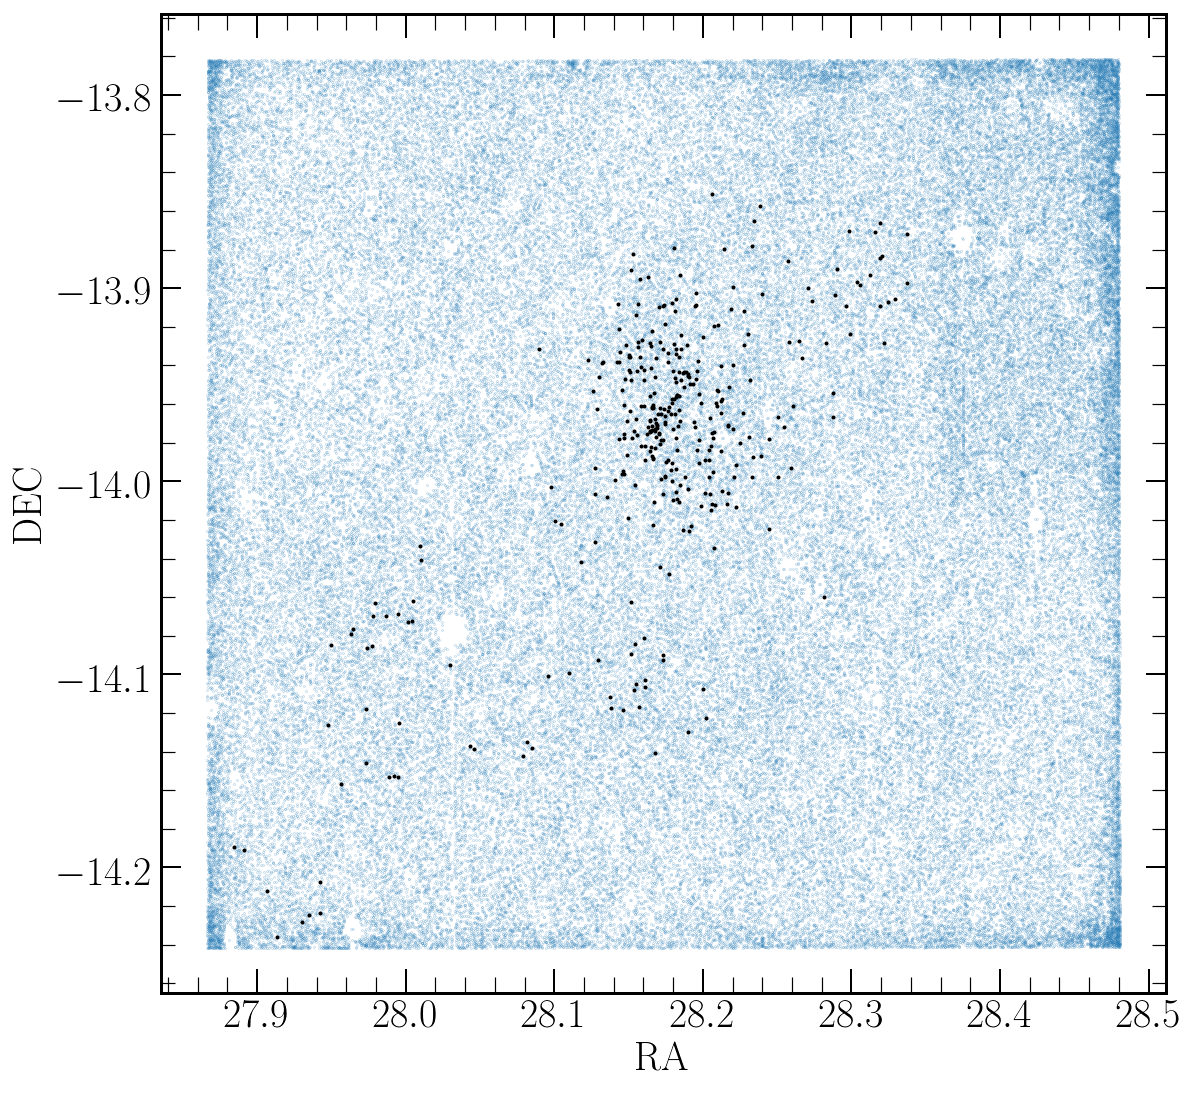

In [47]:
plt.scatter(data_cat_z['ra'],data_cat_z['dec'],s= 0.01)
plt.scatter(table_T['RA_DBTP'],table_T['DEC_DBTP'],s= 1, color='black')
plt.xlabel('RA')
plt.ylabel('DEC')

In [66]:
# Inicialmente retiremos os valores de RA e DEC mais extremos:

data_cat_z = data_cat_z[data_cat_z['ra'] < np.max(table_T['RA_DBTP']) + 0.001]
data_cat_z = data_cat_z[data_cat_z['ra'] > np.min(table_T['RA_DBTP']) - 0.001]
data_cat_z = data_cat_z[data_cat_z['dec'] < np.max(table_T['DEC_DBTP']) + 0.001]
data_cat_z = data_cat_z[data_cat_z['dec'] > -14.162]
data_cat_z = data_cat_z.reset_index(drop=True)

data_cat_v = data_cat_v[data_cat_v['ra'] < np.max(table_T['RA_DBTP']) + 0.001]
data_cat_v = data_cat_v[data_cat_v['ra'] > np.min(table_T['RA_DBTP']) - 0.001]
data_cat_v = data_cat_v[data_cat_v['dec'] < np.max(table_T['DEC_DBTP']) + 0.001]
data_cat_v = data_cat_v[data_cat_v['dec'] > -14.162]
data_cat_v = data_cat_v.reset_index(drop=True)


data_cat_i = data_cat_i[data_cat_i['ra'] < np.max(table_T['RA_DBTP']) + 0.001]
data_cat_i = data_cat_i[data_cat_i['ra'] > np.min(table_T['RA_DBTP']) - 0.001]
data_cat_i = data_cat_i[data_cat_i['dec'] < np.max(table_T['DEC_DBTP']) + 0.001]
data_cat_i = data_cat_i[data_cat_i['dec'] > -14.162]
data_cat_i = data_cat_i.reset_index(drop=True)

data_cat_r = data_cat_r[data_cat_r['ra'] < np.max(table_T['RA_DBTP']) + 0.001]
data_cat_r = data_cat_r[data_cat_r['ra'] > np.min(table_T['RA_DBTP']) - 0.001]
data_cat_r = data_cat_r[data_cat_r['dec'] < np.max(table_T['DEC_DBTP']) + 0.001]
data_cat_r = data_cat_r[data_cat_r['dec'] > -14.162]
data_cat_r = data_cat_r.reset_index(drop=True)



In [67]:
# Adicionar colunas para magnitudes:
table_T['V_P'] = np.nan
table_T['R_P'] = np.nan
table_T['i_P'] = np.nan
table_T['z_P'] = np.nan
table_T['err_V_P'] = np.nan
table_T['err_R_P'] = np.nan
table_T['err_i_P'] = np.nan
table_T['err_z_P'] = np.nan

In [68]:
for i in range(len(table_T)):
        for j in range(len(data_cat_z)):
            # Calculando a distancia:
            dist = calculo_distancia(data_cat_z['ra'][j], data_cat_z['dec'][j],table_T['RA_DBTP'][i], table_T['DEC_DBTP'][i])
            if dist < 1*4.8481*10**(-6):
                table_T['R_P'][i] = data_cat_r['mag'][j]
                table_T['i_P'][i] = data_cat_i['mag'][j]
                table_T['z_P'][i] = data_cat_z['mag'][j]
                table_T['V_P'][i] = data_cat_V['mag'][j]
                table_T['err_R_P'][i] = data_cat_r['err_mag'][j]
                table_T['err_i_P'][i] = data_cat_i['err_mag'][j]
                table_T['err_z_P'][i] = data_cat_z['err_mag'][j]
                table_T['err_V_P'][i] = data_cat_V['err_mag'][j]

/home/anaposses/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/anaposses/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/anaposses/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/anaposses/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:

In [69]:
table_T.to_csv('members_RXJ0152.txt')
table_T.to_csv('backup_04_members_RXJ0152.txt')